# Initialize Fast Metric Calculations

In [1]:
from zotbin.binned import *

In [2]:
from tomo_challenge import load_redshift
from tomo_challenge.jax_metrics import ell_binning

Found classifier Random
Found classifier RandomForest
Found classifier IBandOnly


Load the true redshifts for the training data:

In [3]:
training_file='/media/data2/tomo_challenge_data/ugrizy/training.hdf5'
training_z = load_redshift(training_file)

Calculate the edges to use:

Selected 29 edges.


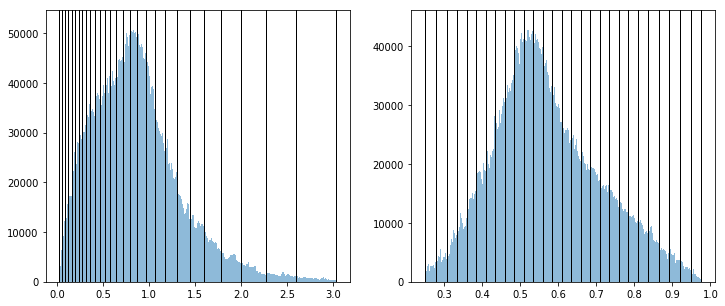

In [4]:
zedges = get_zedges(training_z, plot=True)

Initialise the multipoles to use:

In [5]:
ell, _ = ell_binning()

Calculate the cl's and their partials using these redshift bins:

In [6]:
%time ngals, noise, cl_in = init_binned_cl(zedges, ell)

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/jax/lax/lax.py:5905: UserWarning: Explicitly requested dtype <class 'jax.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


0 (1596, 100)
1 (1596, 100)
2 (1596, 100)
3 (1596, 100)
(1596, 100)
CPU times: user 2min 45s, sys: 16.5 s, total: 3min 1s
Wall time: 2min 56s


Save the results for using later:

In [7]:
save_binned('binned_28.npy', zedges, ell, ngals, noise, cl_in)